# Final project of Business Analytics ( CourseMea)

## loading necessary libraries

In [4]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Importing the CSV file into Notebook

Here we can have used the direct file location for importing the data.

In [7]:
data=pd.read_csv(r'C:\Users\SMART\Downloads\retail_sales_dataset.csv', encoding='latin1')

## Inspecting the data 
we can view the data by using 
+ head() which displays top rows of data.
+ shape shows total number of observations.
+ tail() displays the bottom rows of the data.
+ info() shows variables with missing values and datatypes.

In [9]:
data.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [10]:
data.tail(3)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [11]:
data.shape

(1000, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


a copy of dataframe is created and saved to df variable

In [14]:
df=data.copy()

In [15]:
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [16]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [18]:
print(df.describe(include="all"))

        Transaction ID        Date Customer ID  Gender         Age  \
count      1000.000000        1000        1000    1000  1000.00000   
unique             NaN         345        1000       2         NaN   
top                NaN  2023-05-16     CUST001  Female         NaN   
freq               NaN          11           1     510         NaN   
mean        500.500000         NaN         NaN     NaN    41.39200   
std         288.819436         NaN         NaN     NaN    13.68143   
min           1.000000         NaN         NaN     NaN    18.00000   
25%         250.750000         NaN         NaN     NaN    29.00000   
50%         500.500000         NaN         NaN     NaN    42.00000   
75%         750.250000         NaN         NaN     NaN    53.00000   
max        1000.000000         NaN         NaN     NaN    64.00000   

       Product Category     Quantity  Price per Unit  Total Amount  
count              1000  1000.000000     1000.000000   1000.000000  
unique               

In [19]:
df.describe(include='all')

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

## Data Handling
In this step we will checl for:
+ duplicates and
+ missing values,
+ outliers in the df dataframe.

In [23]:
df.duplicated().sum()

0

In [24]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [25]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [26]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Identify outliers using IQR

In [28]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]


In [29]:
print(outliers)

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [30]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [31]:
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

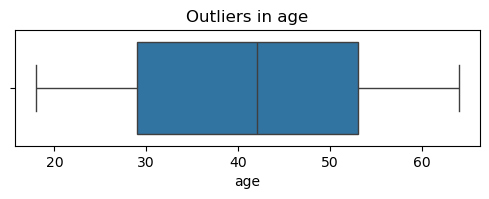

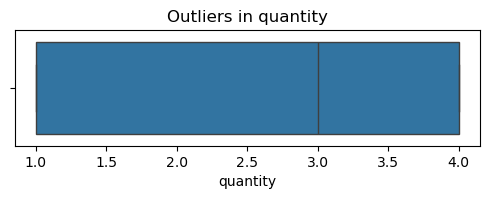

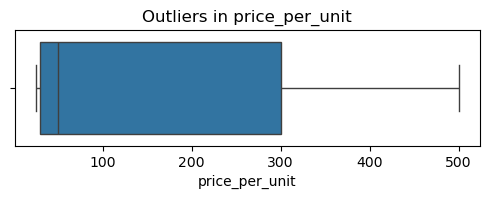

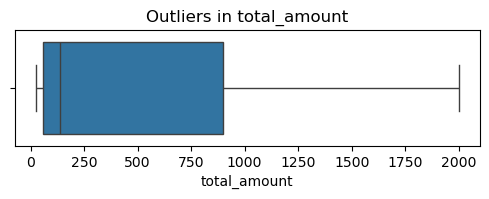

In [32]:
for col in ['age', 'quantity', 'price_per_unit', 'total_amount']:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

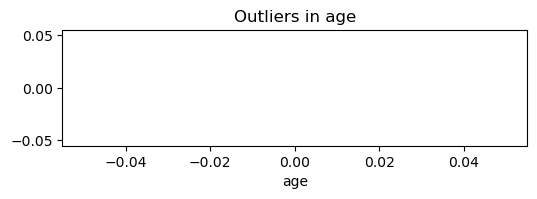

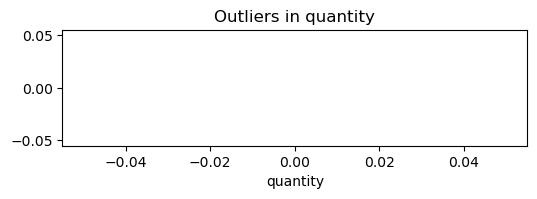

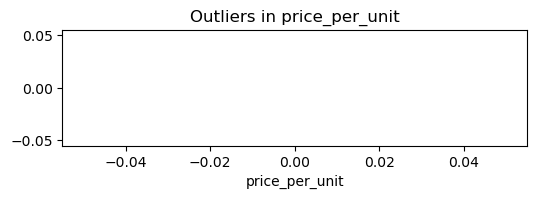

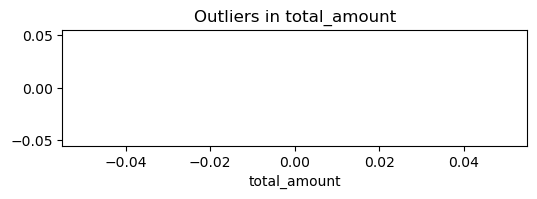

In [33]:
for col in ['age', 'quantity', 'price_per_unit', 'total_amount']:
    plt.figure(figsize=(6, 1.5))
    sns.scatterplot(data=df,x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

In [34]:
from scipy.stats import zscore

# Apply to selected numerical columns
df[['z_age', 'z_quantity', 'z_price', 'z_amount']] = df[['age', 'quantity', 'price_per_unit', 'total_amount']].apply(zscore)

# Define threshold (commonly 3 or -3)
outliers_z = df[(df['z_age'].abs() > 3) |
                (df['z_quantity'].abs() > 3) |
                (df['z_price'].abs() > 3) |
                (df['z_amount'].abs() > 3)]


In [35]:
df['is_outlier'] = ((df['z_age'].abs() > 3) | 
                    (df['z_quantity'].abs() > 3) |
                    (df['z_price'].abs() > 3) |
                    (df['z_amount'].abs() > 3))


In [36]:
print(df['is_outlier'])

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: is_outlier, Length: 1000, dtype: bool


In [37]:
print(df[df['is_outlier'] == True])

Empty DataFrame
Columns: [transaction_id, date, customer_id, gender, age, product_category, quantity, price_per_unit, total_amount, z_age, z_quantity, z_price, z_amount, is_outlier]
Index: []


## Identify Key Trends

In [39]:
df['product_category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [40]:
df['order_month'] = df['date'].dt.to_period('M').dt.to_timestamp()

C:\Users\SMART\AppData\Local\Temp\ipykernel_8884\3766803842.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='order_month',y='quantity',hue='product_category',estimator='sum', ci = None, marker='o',palette='magma')


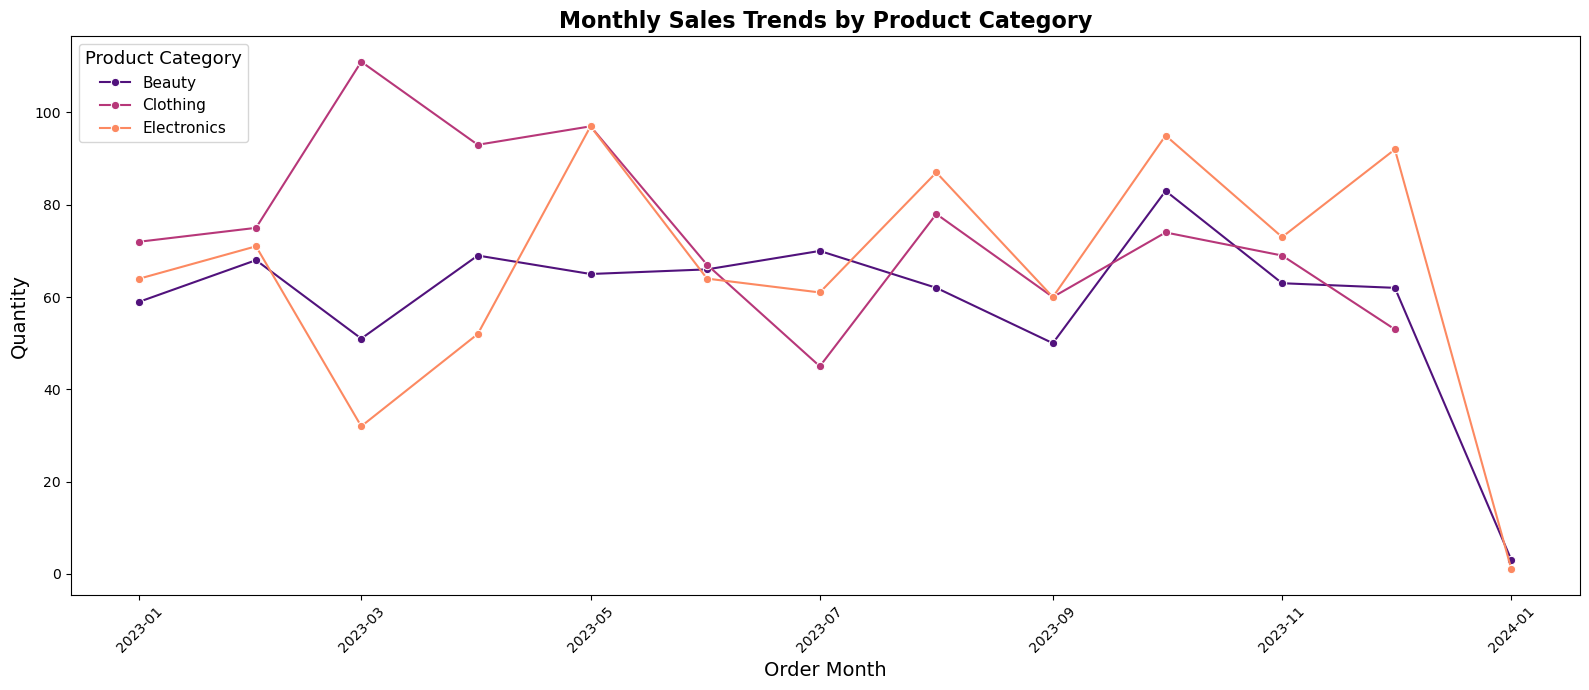

In [41]:
plt.figure(figsize=(16, 7))

# Plot lineplot with markers and palette
sns.lineplot(data=df,x='order_month',y='quantity',hue='product_category',estimator='sum', ci = None, marker='o',palette='magma')

# Add labels and title
plt.title('Monthly Sales Trends by Product Category', fontsize=16, weight='bold')
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Customize legend
plt.legend(title='Product Category', title_fontsize='13', fontsize='11', loc='upper left')

plt.tight_layout()
plt.show()

In [42]:
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount',
       'z_age', 'z_quantity', 'z_price', 'z_amount', 'is_outlier',
       'order_month'],
      dtype='object')

In [43]:
gc=df.groupby('product_category')['quantity'].sum().sort_values(ascending=False)

In [44]:
gc

product_category
Clothing       894
Electronics    849
Beauty         771
Name: quantity, dtype: int64

In [45]:
gG=df.groupby('gender')['quantity'].sum().sort_values(ascending=False)

In [46]:
gG

gender
Female    1298
Male      1216
Name: quantity, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

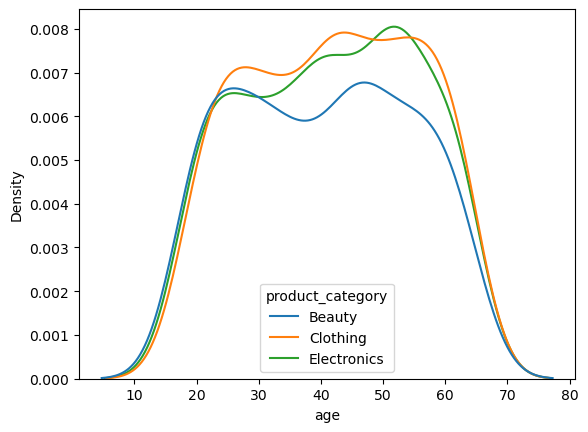

In [47]:
sns.kdeplot(data=df, x='age', hue='product_category', multiple='layer')


<Axes: xlabel='price_per_unit', ylabel='Density'>

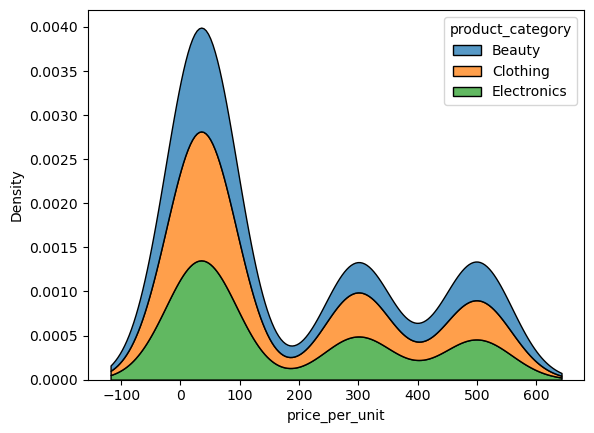

In [48]:
sns.kdeplot(data=df, x='price_per_unit', hue='product_category', multiple='stack')


In [49]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [50]:
df['customer_id'].duplicated().sum()

0

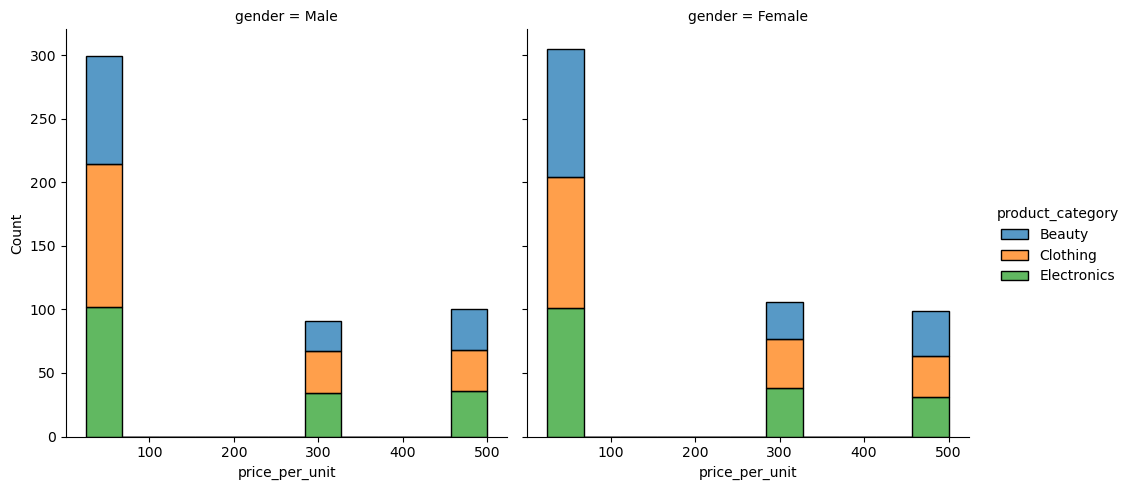

In [51]:
sns.displot(data=df, x="price_per_unit", hue="product_category", col="gender",multiple="stack")

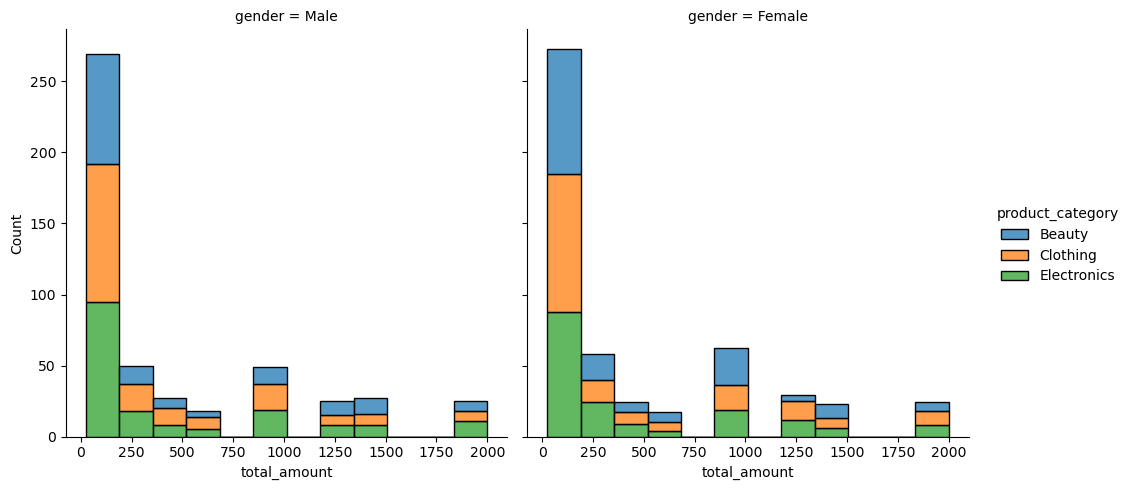

In [52]:
sns.displot(data=df, x="total_amount", hue="product_category", col="gender",multiple="stack")

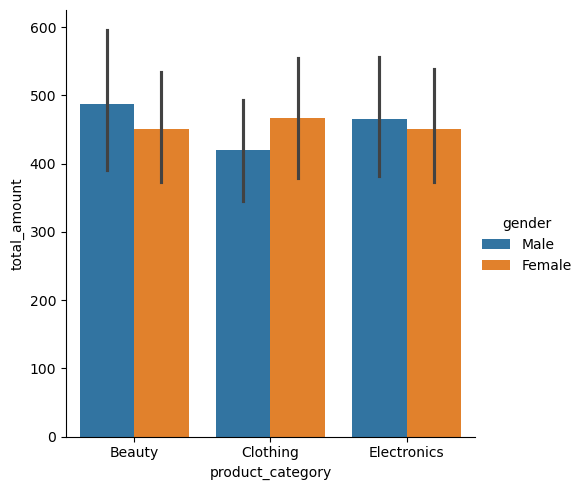

In [53]:
sns.catplot(data=df, kind="bar", x="product_category", y="total_amount", hue="gender")

In [54]:
bins=[0, 12, 20, 65, float('Inf')]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['age_group']=pd.cut(df['age'],bins=bins, labels=labels, right=False)
print(df['age_group'].count())

1000


In [55]:
df['age_group'].isnull().sum()

0

C:\Users\SMART\AppData\Local\Temp\ipykernel_8884\1303036280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_sales = df.groupby('age_group')['total_amount'].sum()


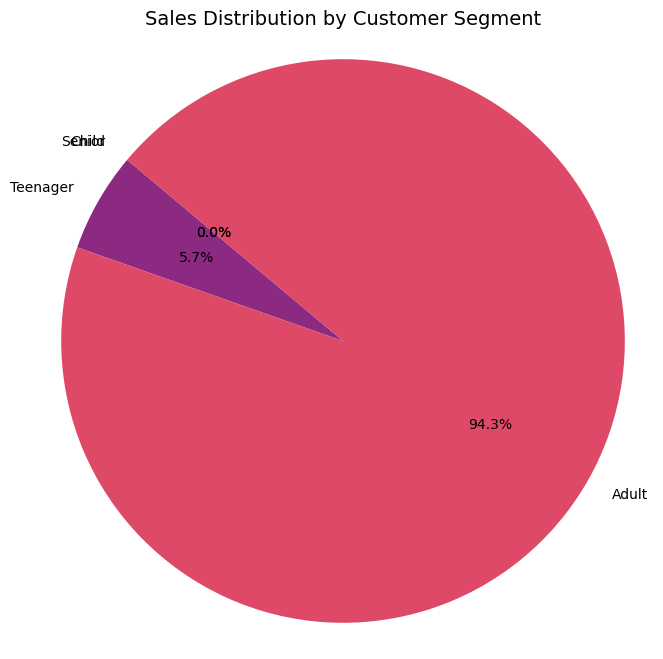

In [56]:

segment_sales = df.groupby('age_group')['total_amount'].sum()

colors = sns.color_palette("magma", len(segment_sales))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sales Distribution by Customer Segment", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

In [ ]:
sns.pairplot(data=df, hue="order_month")

In [ ]:
df['price_per_unit'].mode()

In [ ]:
sns.color_palette("husl", 8)
sns.histplot(data=df, x="quantity", y="total_amount")

In [ ]:
age_sales = df.groupby('age_group')['total_amount'].sum()

age_count = df['age_group'].value_counts()
colors = sns.color_palette("husl", 8)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_sales, labels=age_count.index, autopct='%1.1f%%', startangle=160, labeldistance=1.5, colors=colors)
plt.title("Sales  by Age Group", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

## import sklearn to see Correlation

In [ ]:
import sklearn

In [ ]:
df.columns

In [ ]:
x=pd.Series(df['order_month'])
y=pd.Series(df['age'])

In [ ]:
cor=y.corr(x)
cor

there's no significant correlation between age and order month

In [ ]:
a=pd.Series(df['total_amount'])
b=pd.Series(df['quantity'])
cor=b.corr(a)
cor

In [ ]:
ax = sns.heatmap(df[['total_amount', 'quantity']].corr(), annot=True)

In [ ]:
df["customer_id_num"]=df['customer_id'].str.extract(r'(\d+)')
c=pd.Series(df['total_amount'])
d=pd.Series(df['customer_id_num'])
cor_c=d.corr(c)
cor_c

In [ ]:
df.to_csv(r'C:\Users\SMART\Downloads\BA_retail_data.csv',index=False)